<a href="https://colab.research.google.com/github/Davichobacter/ds-4geeks/blob/main/credit_card_EDA_DESCRIPTIVE(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

# important things...

Things to consider:

Range only take in mind the tails not all data points.
kurtosis think in outliers points..
kurtorsis > 0 there are more outliers than in a normal distribution!
in Risk more profit or losses (rare eventes).
kurtosis < 0 data more concetrated near to mean, if tend to zero is normal.

A positive skewness indicates that most of the data are on the left and there are a few very high values on the right. A negative skewness indicates that there are more unusually low values. If it is close to zero, it suggests that the data are quite symmetrical.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/credit_card_consumption.csv"
df = pd.read_csv(url)

In [3]:
df.describe()

,age,monthly_consumption,tenure,number_transactions_month,average_transaction_cost,average_purchase_value
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,39.913485,276.176397,60.045489,6.995187,0.703196,40.337592
std,4.116885,140.707970,0.521289,0.913078,0.252686,21.708900
min,26.841524,26.083098,57.412974,2.000000,0.050197,3.726157
25%,37.129281,171.423277,59.764259,7.000000,0.520502,24.333111
50%,39.961067,256.301572,60.130523,7.000000,0.677593,36.038248
75%,42.844416,356.507869,60.432031,7.000000,0.849183,51.611062
max,54.059656,896.409908,60.956154,10.000000,1.695130,145.125343


In [4]:
df.corr(method='pearson')

,age,monthly_consumption,tenure,number_transactions_month,average_transaction_cost,average_purchase_value
age,1.000000,0.027854,-0.048124,0.000329,0.050331,0.026678
monthly_consumption,0.027854,1.000000,-0.040474,-0.011604,0.813656,0.937680
tenure,-0.048124,-0.040474,1.000000,0.023810,-0.027674,-0.027744
number_transactions_month,0.000329,-0.011604,0.023810,1.000000,-0.230327,-0.302685
average_transaction_cost,0.050331,0.813656,-0.027674,-0.230327,1.000000,0.855823
average_purchase_value,0.026678,0.937680,-0.027744,-0.302685,0.855823,1.000000


In [5]:
df.corr(method='spearman')

,age,monthly_consumption,tenure,number_transactions_month,average_transaction_cost,average_purchase_value
age,1.000000,0.034804,-0.056543,0.024082,0.052904,0.032485
monthly_consumption,0.034804,1.000000,-0.036249,-0.036771,0.792974,0.967362
tenure,-0.056543,-0.036249,1.000000,0.038731,-0.038409,-0.042303
number_transactions_month,0.024082,-0.036771,0.038731,1.000000,-0.185313,-0.257008
average_transaction_cost,0.052904,0.792974,-0.038409,-0.185313,1.000000,0.815012
average_purchase_value,0.032485,0.967362,-0.042303,-0.257008,0.815012,1.000000


<Axes: >

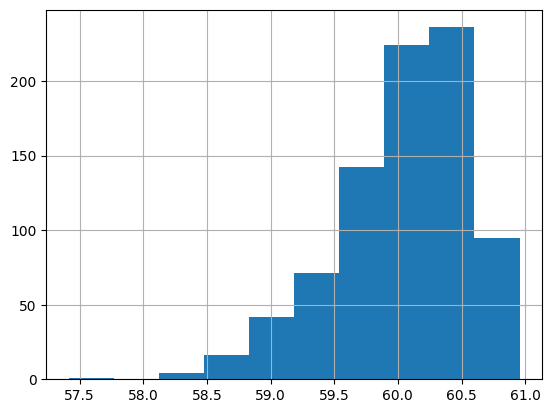

In [ ]:
df['tenure'].hist() # left sweked  (tail toward left)

<Axes: >

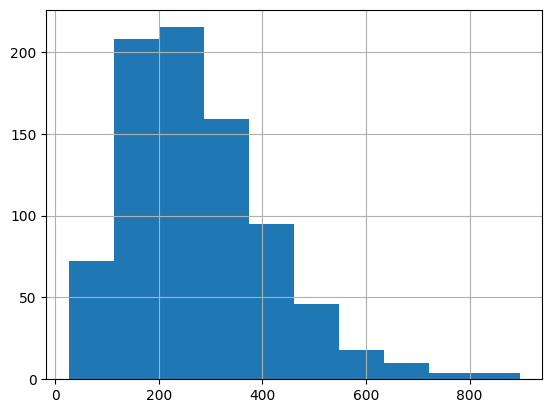

In [ ]:
df['monthly_consumption'].hist() # right sweked (tail toward right)

<Axes: >

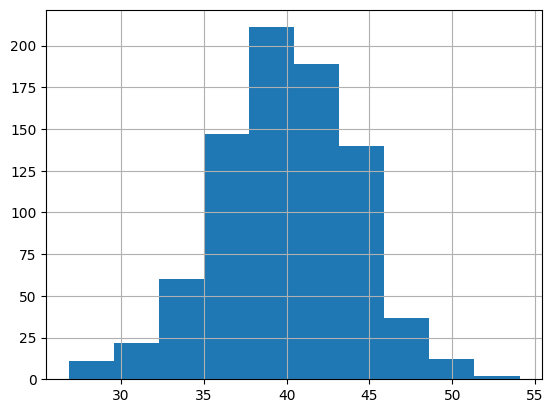

In [ ]:
df['age'].hist() # looks like normal

<Axes: >

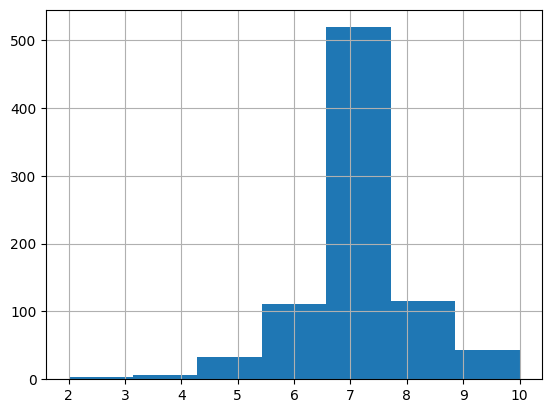

In [ ]:
df['number_transactions_month'].hist(bins=7) # longs tails

In [6]:
df.kurt()

,0
age,0.155326
monthly_consumption,1.618574
tenure,1.125498
number_transactions_month,3.573160
average_transaction_cost,0.843790
average_purchase_value,1.969106


In [7]:
df.skew()

,0
age,-0.181828
monthly_consumption,1.032633
tenure,-0.927886
number_transactions_month,-0.399814
average_transaction_cost,0.671216
average_purchase_value,1.164439


#see the skewness

negative implies long tail in left

positive imples long tail to right

zero is more symetrical

In [8]:
df.quantile(0.5)

,0.5
age,39.961067
monthly_consumption,256.301572
tenure,60.130523
number_transactions_month,7.000000
average_transaction_cost,0.677593
average_purchase_value,36.038248


# Range, Interquantile range, Coefficiente of variation, Kurtosis and Skewness.

you can complete descriptive in 4GEEKS.

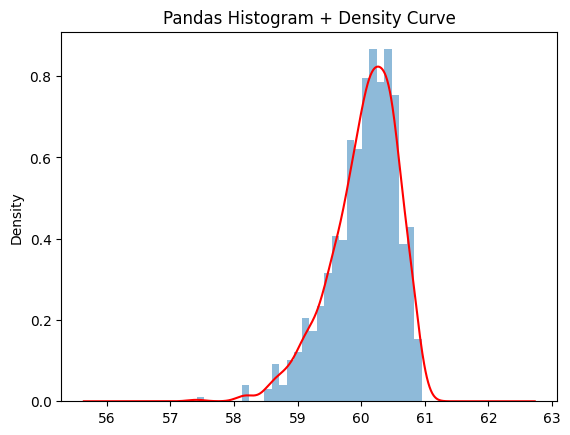

In [9]:
# Plot histogram with density
df['tenure'].plot(kind='hist', density=True, bins=30, alpha=0.5)
df['tenure'].plot(kind='kde', color='red')

plt.title("Pandas Histogram + Density Curve")
plt.show()

In [10]:
def client_rank(consumption):
  if consumption > 100 and consumption < 300:
    return "silver"
  elif consumption >= 300 and consumption < 700:
    return 'premium'
  elif consumption >= 700:
    return "gold"
  else:
    return 'temporal'

In [11]:
df['monthly_consumption'].apply(client_rank)

,monthly_consumption
0,premium
1,temporal
2,silver
3,premium
4,silver
...,...
826,silver
827,silver
828,silver
829,premium


In [12]:
df['rank_client'] = df['monthly_consumption'].apply(client_rank)

In [13]:
df[df['rank_client']=='temporal'].head()

,age,monthly_consumption,tenure,number_transactions_month,average_transaction_cost,average_purchase_value,rank_client
1,39.869980,43.502610,59.799157,9,0.398929,4.833623,temporal
18,37.818366,27.293319,60.900618,7,0.307353,3.899046,temporal
98,34.210532,73.438154,60.555234,9,0.504456,8.159795,temporal
104,40.921293,99.534578,58.836874,5,0.625455,19.906916,temporal
106,28.941718,26.694625,60.479561,7,0.220665,3.813518,temporal


<Axes: xlabel='rank_client', ylabel='age'>

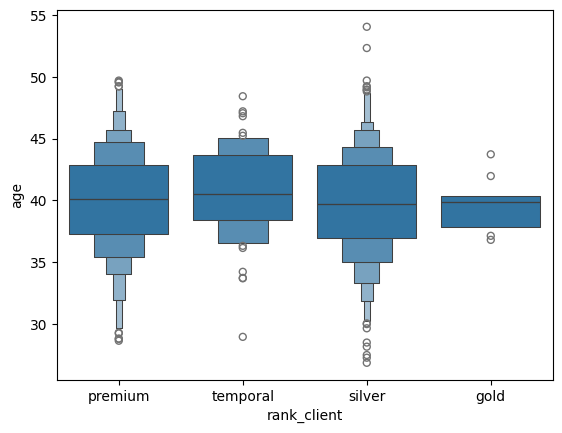

In [14]:
sns.boxenplot(x = 'rank_client', y = 'age', data = df)